<h1> PTRAIL Interpolation </h1>
<h2> Linear and Cubic Interpolation Examples </h2>

<p align='justify'>
    This Notebook contains the examples for Linear and Cubic Interpolations.
    It reads a file and interpolates points first using linear and then cubic
    interpolation method by providing the dataframe and a time difference
    threshold beyond which points need to be interpolated and the interpolation
    type which by default is linear. The original data, linearly and cubicly
    manipulated data are all plotted to show the difference between trajectories.
    A segment of the original data is taken and interpolated and by plotting it
    a clear difference in the interpolation points are shown.
</p>

<hr>

The following datasets have been used in this Jupyter Notebook:
<ul>
   <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/gulls.csv" target="_blank"> Seagulls Dataset </a> </li>
   <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/atlantic.csv%22%3E"> Hurricane Dataset </a> </li>
</ul>

<hr>
<p align='justify'>
Note: Viewing this notebook in GitHub will not render JavaScript
elements. Hence, for a better experience, click the link below 
to open the Jupyter notebook in NB viewer.

<span> &#8618; </span>
<a href="https://nbviewer.jupyter.org/github/YakshHaranwala/PTRAIL/blob/main/examples/4.%20Linear_And_Cubic_IP.ipynb" target='_blank'> Click </a>
</p>

In [1]:
from ptrail.core.TrajectoryDF import PTRAILDataFrame
import matplotlib.pyplot as plt
import folium
from ptrail.preprocessing.interpolation import Interpolation as ip
from ptrail.utilities.conversions import Conversions as con
import ptrail.utilities.constants as const
import pandas as pd
from IPython.display import display

In [2]:
%%time

"""
    First of all, lets import all the datasets one by one
    and check out a few of their points and plot the
    dataframe.
"""

# Reading the gulls dataset and converting to PTRAILDataFrame.
# Also, lets, print the first 5 points of the dataset to
# see how the dataframe looks.
gulls = pd.read_csv('https://raw.githubusercontent.com/YakshHaranwala/PTRAIL/main/examples/data/gulls.csv')
gulls_df = PTRAILDataFrame(gulls,
                           latitude='location-lat',
                           longitude='location-long',
                           datetime='timestamp',
                           traj_id='tag-local-identifier',
                           rest_of_columns=[])
gulls_df.head()

CPU times: user 314 ms, sys: 46.5 ms, total: 361 ms
Wall time: 1.55 s


event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  
traj_id DateTime                                                                
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...

In [3]:
%%time

# First, we will filter out a single trajectory from the sea-gulls
# dataset and check how many of the trajectory's points have
# time jump greater than what the examples are using to interpolate

small_gulls = gulls_df.reset_index().loc[gulls_df.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_gulls.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 3600*4).value_counts())

True     1501
False     469
Name: DateTime, dtype: int64
CPU times: user 38.6 ms, sys: 23.4 ms, total: 62 ms
Wall time: 62.3 ms


In [4]:
# Here, we plot the smaller trajectory on a folium map.
sw = small_gulls[['lat', 'lon']].min().values.tolist()
ne = small_gulls[['lat', 'lon']].max().values.tolist()
coords = [zip(small_gulls[const.LAT], small_gulls[const.LONG])]
m1 = folium.Map(location=[small_gulls[const.LAT].iloc[0], small_gulls[const.LONG].iloc[0]], zoom_start=1000)

folium.PolyLine(coords,
                color='blue',
                weight=2,
                opacity=0.7).add_to(m1)
m1.fit_bounds([sw, ne])
display(m1)

In [5]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using linear interpolation.

small_linear_gulls = ip.interpolate_position(small_gulls,
                                            time_jump=3600*4,
                                            ip_type='linear')
print(f"Original DF Length: {len(small_gulls)}")
print(f"Interpolated DF Length: {len(small_linear_gulls)}")

Original DF Length: 1970
Interpolated DF Length: 3471
CPU times: user 37.8 ms, sys: 24.8 ms, total: 62.6 ms
Wall time: 5.2 s


In [6]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using cubic interpolation.
small_cubic_gulls = ip.interpolate_position(small_gulls,
                                           time_jump=3600*4,
                                           ip_type='cubic')
print(f"Original DF Length: {len(small_gulls)}")
print(f"Interpolated DF Length: {len(small_cubic_gulls)}")

Original DF Length: 1970
Interpolated DF Length: 3471
CPU times: user 21.3 ms, sys: 28.6 ms, total: 49.9 ms
Wall time: 5.06 s


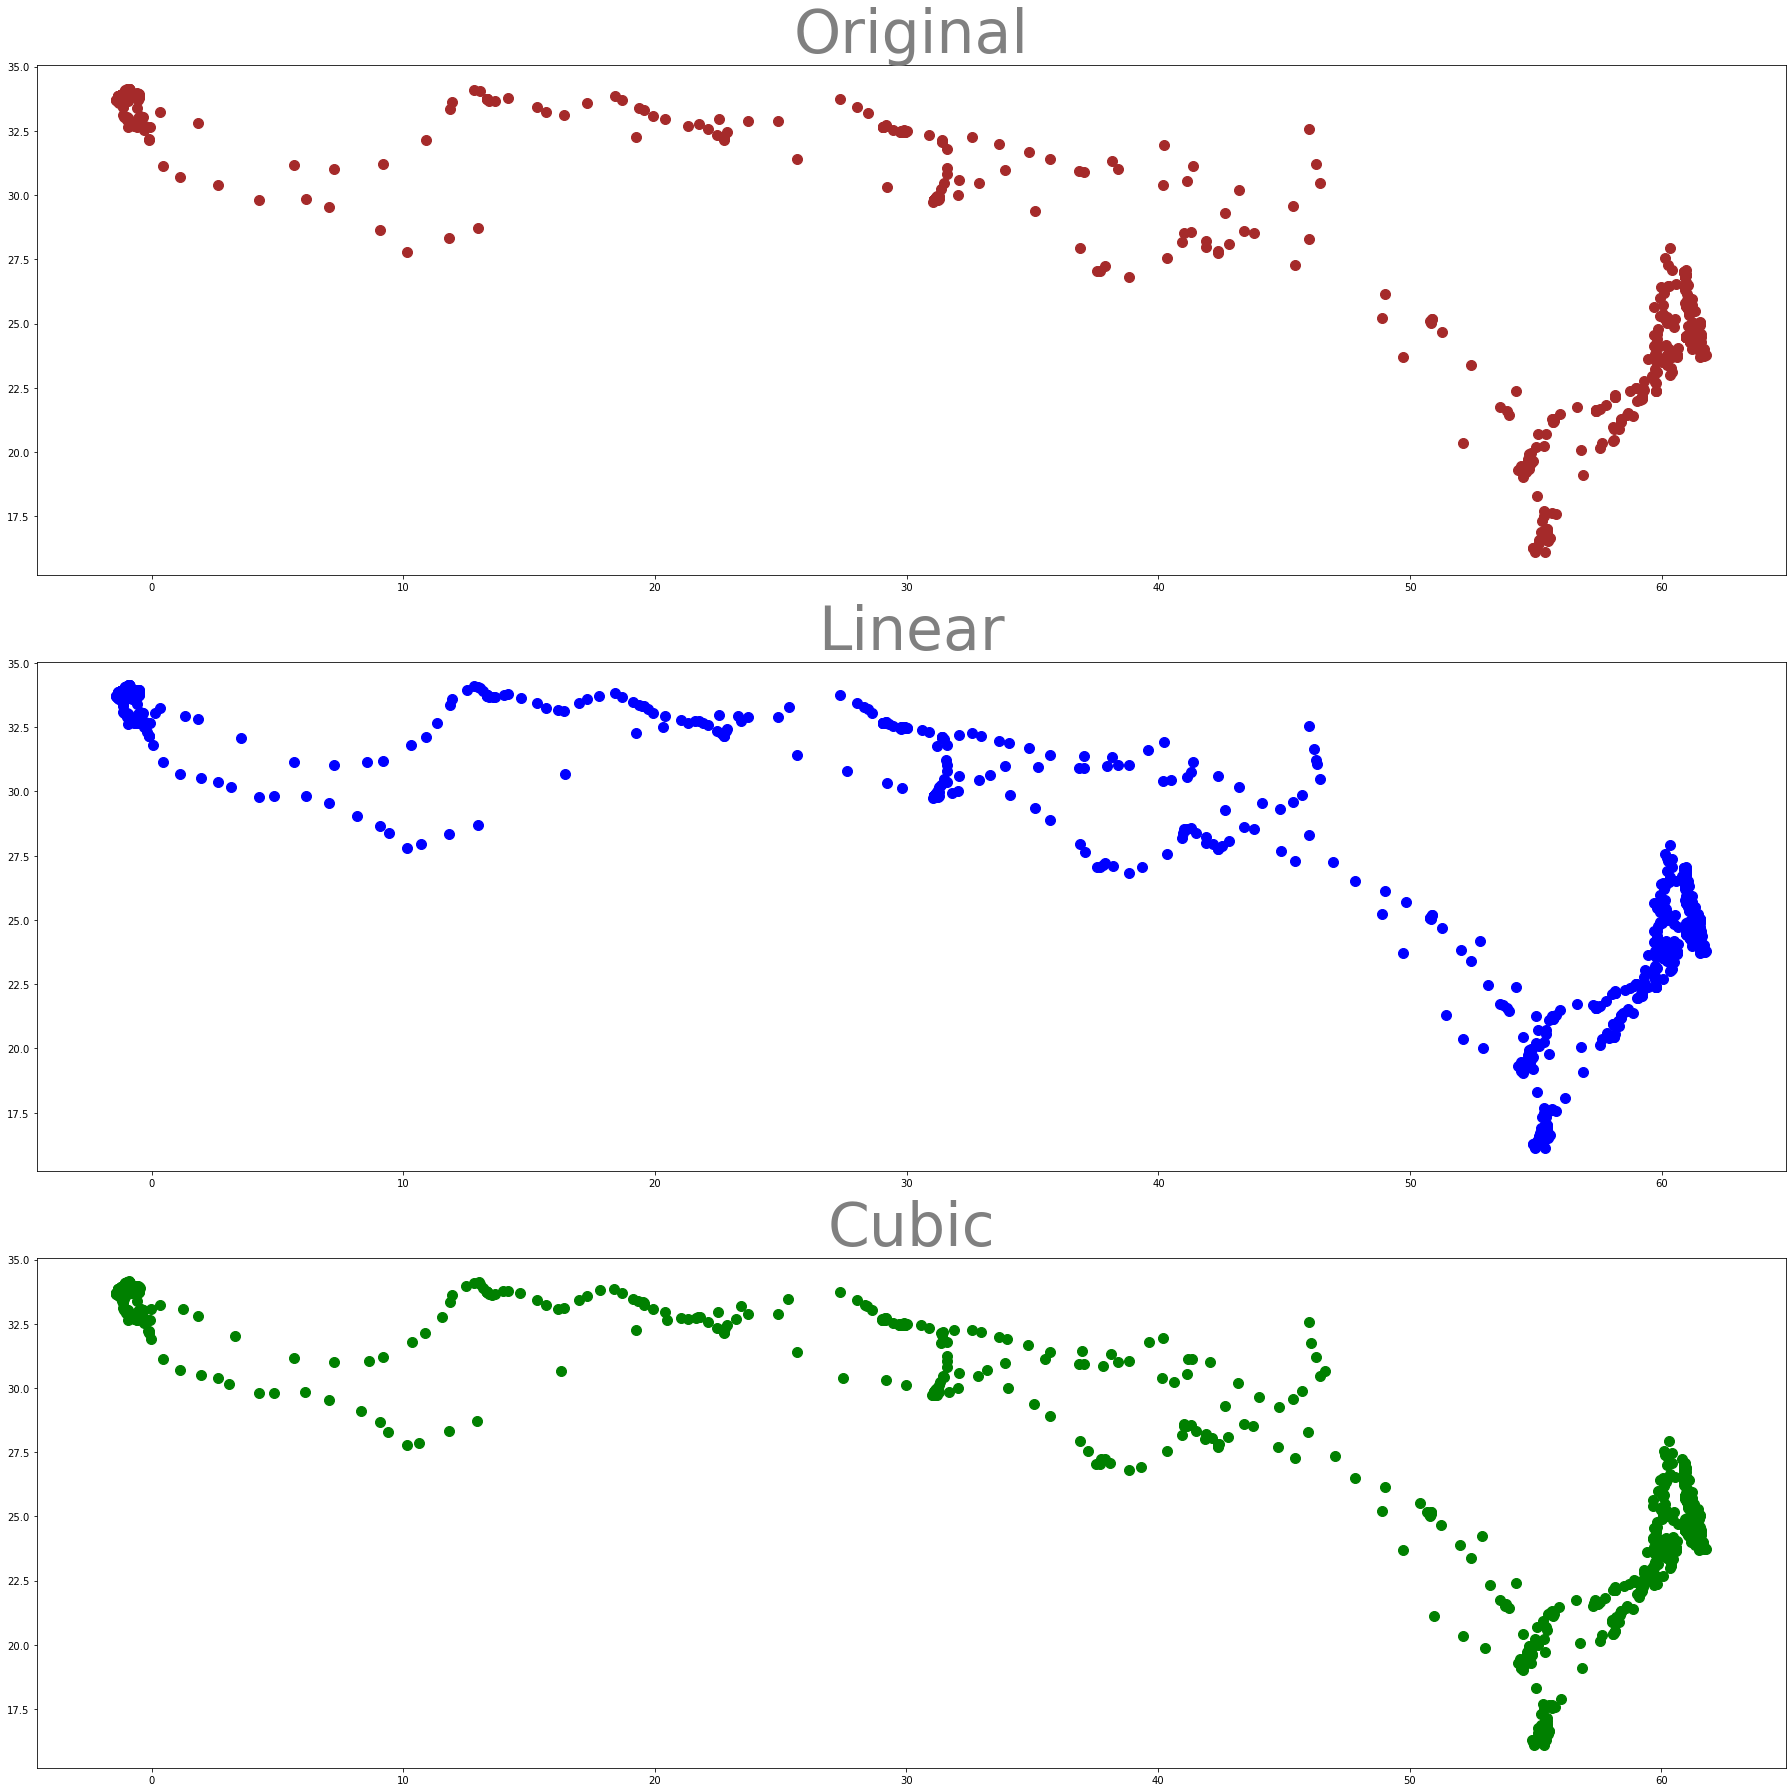

In [7]:
# Here, plot the scatter points of following 3 trajectories:
# 1. Original Small DF.
# 2. Linear-Interpolated Small DF.
# 3. Cubic-Interpolated Small DF.

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
axes[0].scatter(small_gulls[const.LAT],
                small_gulls[const.LONG],
                s=100, color='brown')
axes[0].set_title('Original', fontsize=60, color='grey')
axes[1].scatter(small_linear_gulls[const.LAT],
                small_linear_gulls[const.LONG],
                s=100, color='blue')
axes[1].set_title('Linear', fontsize=60, color='grey')
axes[2].scatter(small_cubic_gulls[const.LAT],
                small_cubic_gulls[const.LONG],
                s=100, color='green')
axes[2].set_title('Cubic', fontsize=60, color='grey')

fig.tight_layout()

In [8]:
%%time
"""
    1. Reading the atlantic dataset, cleaning it up and then
       converting it to PTRAILDataFrame.
    2. It is to be noted that apart from reading the dataset,
       before converting to PTRAILDataFrame, the dataframe needs
       some cleanup as the Time format provided in the dataframe
       needs to be first converted into a library supported time
       format. Also, the format of the coordinates need to be
       converted to library supported format before converting'
       it to PTRAILDataFrame.
    3. Also, lets, print the first 5 points of the dataset to
      see how the dataframe looks.
"""
atlantic = pd.read_csv('https://raw.githubusercontent.com/YakshHaranwala/PTRAIL/main/examples/data/atlantic.csv')
atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
atlantic_df = PTRAILDataFrame(atlantic,
                              latitude='Latitude',
                              longitude='Longitude',
                              datetime='DateTime',
                              traj_id='ID',
                              rest_of_columns=[])
atlantic_df.head()

CPU times: user 7.89 s, sys: 87.1 ms, total: 7.97 s
Wall time: 9.41 s


Name      Date  Time Event  \
traj_id  DateTime                                                         
AL011851 1851-06-25 00:00:00              UNNAMED  18510625     0         
         1851-06-25 06:00:00              UNNAMED  18510625   600         
         1851-06-25 12:00:00              UNNAMED  18510625  1200         
         1851-06-25 18:00:00              UNNAMED  18510625  1800         
         1851-06-25 21:00:00              UNNAMED  18510625  2100     L   

                             Status   lat   lon  Maximum Wind  \
traj_id  DateTime                                               
AL011851 1851-06-25 00:00:00     HU  28.0 -94.8            80   
         1851-06-25 06:00:00     HU  28.0 -95.4            80   
         1851-06-25 12:00:00     HU  28.0 -96.0            80   
         1851-06-25 18:00:00     HU  28.1 -96.5            80   
         1851-06-25 21:00:00     HU  28.2 -96.8            80   

                              Minimum Pressure  Low Wind NE  ...  Low Wind SW  \
traj_id  DateTime                                            ...                
AL011851 1851-06-25 00:00:00              -999         -999  ...         -999   
         1851-06-25 06:00:00              -999         -999  ...         -999   
         1851-06-25 12:00:00              -999         -999  ...         -999   
         1851-06-25 18:00:00              -999         -999  ...         -999   
         1851-06-25 21:00:00              -999         -999  ...         -999   

                              Low Wind NW  Moderate Wind NE  Moderate Wind SE  \
traj_id  DateTime                                                               
AL011851 1851-06-25 00:00:00         -999              -999              -999   
         1851-06-25 06:00:00         -999              -999              -999   
         1851-06-25 12:00:00         -999              -999              -999   
         1851-06-25 18:00:00         -999              -999              -999   
         1851-06-25 21:00:00         -999              -999              -999   

                              Moderate Wind SW  Moderate Wind NW  \
traj_id  DateTime                                                  
AL011851 1851-06-25 00:00:00              -999              -999   
         1851-06-25 06:00:00              -999              -999   
         1851-06-25 12:00:00              -999              -999   
         1851-06-25 18:00:00              -999              -999   
         1851-06-25 21:00:00              -999              -999   

                              High Wind NE  High Wind SE  High Wind SW  \
traj_id  DateTime                                                        
AL011851 1851-06-25 00:00:00          -999          -999          -999   
         1851-06-25 06:00:00          -999          -999          -999   
         1851-06-25 12:00:00          -999          -999          -999   
         1851-06-25 18:00:00          -999          -999          -999   
         1851-06-25 21:00:00          -999          -999          -999   

                              High Wind NW  
traj_id  DateTime                           
AL011851 1851-06-25 00:00:00          -999  
         1851-06-25 06:00:00          -999  
         1851-06-25 12:00:00          -999  
         1851-06-25 18:00:00          -999  
         1851-06-25 21:00:00          -999  

[5 rows x 21 columns]

In [9]:
%%time

# Here, we will filter out a single trajectory from the atlantic
# dataset and check how many of the trajectory's points have
# time jump greater than what the examples are using to interpolate

small_atlantic = atlantic_df.reset_index().loc[atlantic_df.reset_index()[const.TRAJECTORY_ID] == 'AL062010'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_atlantic.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 3600*4).value_counts())

True     50
False     1
Name: DateTime, dtype: int64
CPU times: user 21.3 ms, sys: 0 ns, total: 21.3 ms
Wall time: 19.6 ms


In [10]:
# Here, we plot the smaller trajectory on a folium map.
sw = small_atlantic[['lat', 'lon']].min().values.tolist()
ne = small_atlantic[['lat', 'lon']].max().values.tolist()
coords = [zip(small_atlantic[const.LAT], small_atlantic[const.LONG])]
m2 = folium.Map(location=[small_atlantic[const.LAT].iloc[0],
                          small_atlantic[const.LONG].iloc[0]],
                zoom_start=1000)

folium.PolyLine(coords,
                color='blue',
                weight=2,
                opacity=0.7).add_to(m2)
m2.fit_bounds([sw, ne])
display(m2)

In [11]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using linear interpolation.

small_linear_atlantic = ip.interpolate_position(small_atlantic,
                                                     time_jump=3600*4,
                                                     ip_type='linear')
print(f"Original DF Length: {len(small_atlantic)}")
print(f"Interpolated DF Length: {len(small_linear_atlantic)}")

Original DF Length: 51
Interpolated DF Length: 101
CPU times: user 24.2 ms, sys: 16.1 ms, total: 40.3 ms
Wall time: 377 ms


In [12]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using cubic interpolation.

small_cubic_atlantic = ip.interpolate_position(small_atlantic,
                                                    time_jump=3600*4,
                                                    ip_type='cubic')
print(f"Original DF Length: {len(small_atlantic)}")
print(f"Interpolated DF Length: {len(small_cubic_atlantic)}")

Original DF Length: 51
Interpolated DF Length: 101
CPU times: user 12.4 ms, sys: 28.1 ms, total: 40.5 ms
Wall time: 340 ms


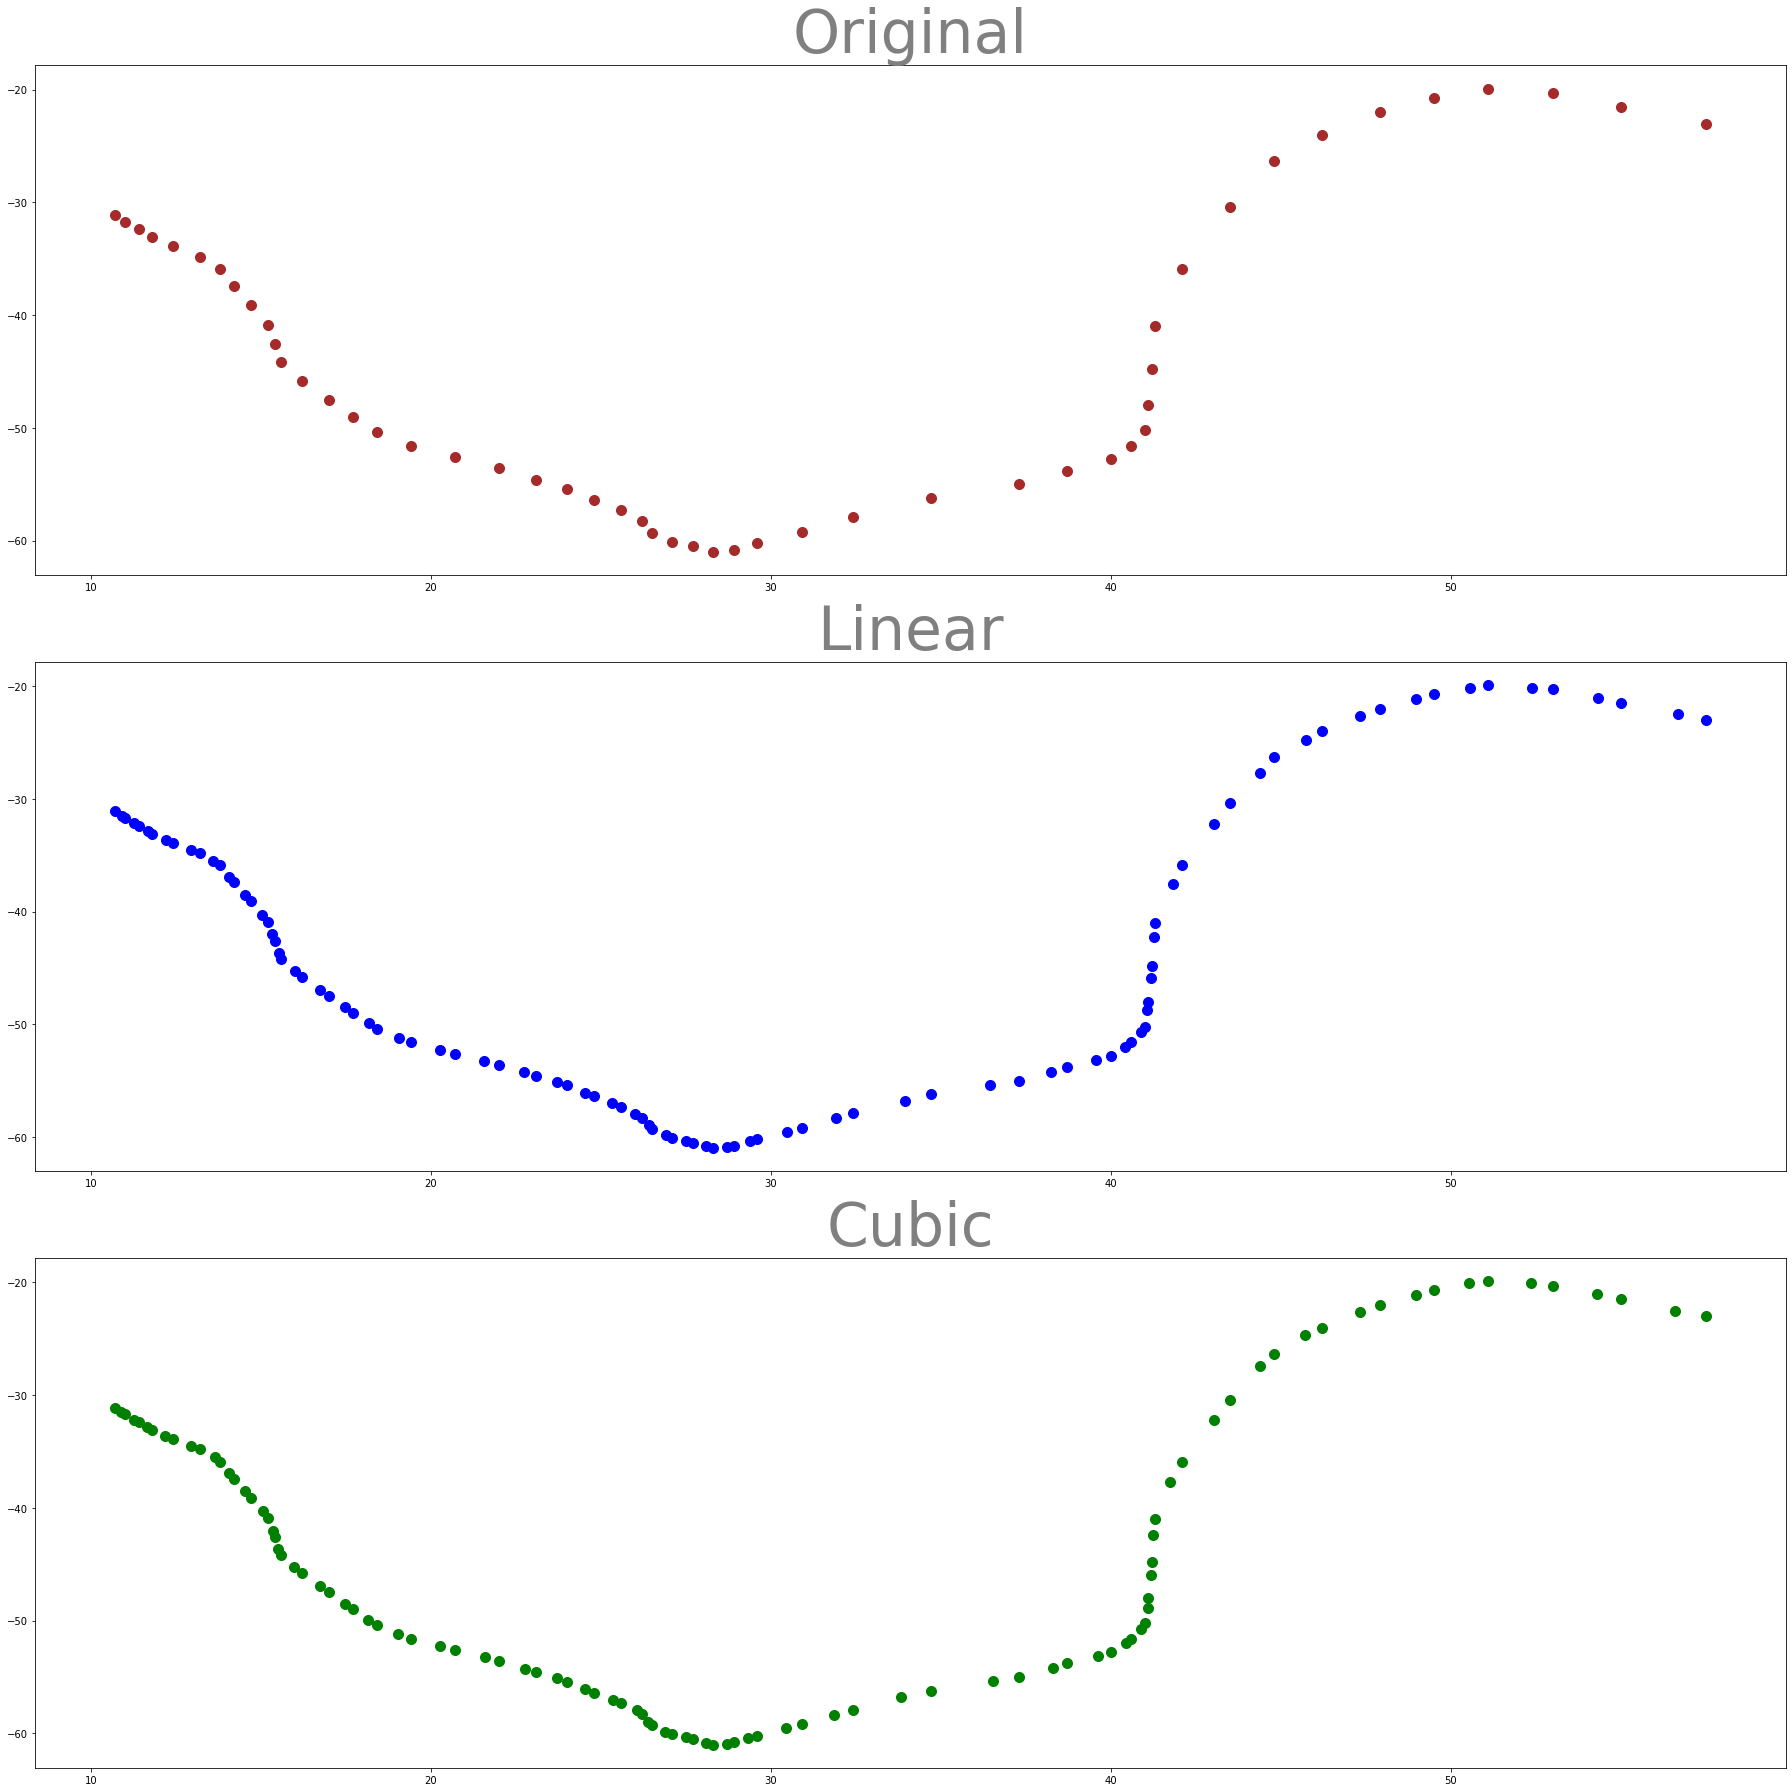

In [13]:
# Here, plot the scatter points of following 3 trajectories:
# 1. Original Small DF.
# 2. Linear-Interpolated Small DF.
# 3. Cubic-Interpolated Small DF.

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
axes[0].scatter(small_atlantic[const.LAT],
                small_atlantic[const.LONG],
                s=100, color='brown')
axes[0].set_title('Original', fontsize=60, color='grey')
axes[1].scatter(small_linear_atlantic[const.LAT],
                small_linear_atlantic[const.LONG],
                s=100, color='blue')
axes[1].set_title('Linear', fontsize=60, color='grey')
axes[2].scatter(small_cubic_atlantic[const.LAT],
                small_cubic_atlantic[const.LONG],
                s=100, color='green')
axes[2].set_title('Cubic', fontsize=60, color='grey')

fig.tight_layout()

In [14]:
%%time

"""
    Finally, here we show how an entire Dataframe containing
    several trajectories can be passed to the interpolation
    function and how the number of points will be added
    to the dataframe based on the user-provided time jump.
"""

# Here, Interpolate the original seagulls dataset using linear
# interpolation and then show the difference in the number of
# points to see how the dataframe's trajectories have been
# interpolated.

linear_ip_gulls = ip.interpolate_position(dataframe=gulls_df,
                                 time_jump=3600*4)
print(f"Original DF length: {len(gulls_df)}")
print(f"Linear Interpolated DF length: {len(linear_ip_gulls)}")

Original DF length: 89869
Linear Interpolated DF length: 157775
CPU times: user 173 ms, sys: 96.4 ms, total: 270 ms
Wall time: 44.8 s


In [15]:
%%time

# Here, Interpolate the original seagulls dataset using cubic
# interpolation and then show the difference in the number of
# points to see how the dataframe's trajectories have been
# interpolated.

cubic_ip_gulls = ip.interpolate_position(dataframe=gulls_df,
                                   time_jump=3600*4,
                                   ip_type='cubic')
print(f"Original DF length: {len(gulls_df)}")
print(f"Cubic Interpolated DF length: {len(cubic_ip_gulls)}")

Original DF length: 89869
Cubic Interpolated DF length: 157775
CPU times: user 168 ms, sys: 153 ms, total: 321 ms
Wall time: 48 s
